<div dir="rtl">

# دیباچه


این مخزن در پی انتشار آموزش نزدیک‌ترین همسایگی تهیه شد. هم به عنوان نمونه کد این الگوریتم و هم به عنوان نمونه کد کاربرد یادگیری ماشین در معامله الگوریتمی!
</br>

[آموزش نزدیک‌ترین همسایگی](https://www.youtube.com/watch?v=yl6evu-Fhs4) 

[منبع اقتباس](https://www.youtube.com/playlist?list=PLwEOixRFAUxZmM26EYI1uYtJG39HDW1zm)


راستی کتابخونه هایی که این دفترچه با اون‌ها کار می کنه تو فایل requirements.txt درج شدن. 
کافیه بعد از ساخت محیط مجازی دستور پایین رو بزنید: 
</br>
pip install -r requirements.txt


</div>


<div dir="rtl">

# دریافت داده‌های بازار

شما می‌تونید داده‌ها رو مثلا از [مثلا از این سایت](https://www.dukascopy.com/swiss/english/marketwatch/historical/) دانلود و به صورت فایل آماده وارد برنامه کنید که 
ما هم از همین روش رفتیم و فایل مورد استفاده هم براتون قرار دادم.

همین طور می‌تونید با ماژول‌های پایتونی مثل یاهو فاینانس یا متاتریدر اقدام به دانلود داده کنید. 
نمونه کد این دو روش هم پایین براتون گذاشتم ولی کامنت کردم که اجرا نشن.
</div>



In [46]:
# دریافت از متاتریدر
# import MetaTrader5 as mt5 # pip install MetaTrader5
# # establish MetaTrader 5 connection to a specified trading account
# if not mt5.initialize(login=1234567, server="ِYour_server",password="yourpass"):
#     print("initialize() failed, error code =",mt5.last_error())

# # display data on connection status, server name and trading account
# print(mt5.version())
# # display data on MetaTrader 5 version
# print(mt5.terminal_info())

In [47]:
# timezone = pytz.timezone("Etc/UTC")
# utc_from = datetime(2021,1,10,tzinfo=timezone)
# utc_to = datetime(2021,11,10,tzinfo=timezone)
# rates_array = mt5.copy_rates_range("EURUSD", mt5.TIMEFRAME_M12, utc_from, utc_to)
# rate_df = pd.DataFrame(rates_array)
# rate_df['time'] = pd.to_datetime(rate_df['time'], unit='s')
# rate_df = rate_df.rename(columns={'time':'Gmt time', 'tick_volume':'volume'})
# rate_df.head()

In [48]:
# دریافت داده‌های از ماژول پایتونی یاهو فاینانس
# import yfinance as yf # pip install yfinance
# data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
# data.head(10)

In [49]:
#دریافت داده‌ها از فایل آماده 
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_1_D_ASK_05.05.2003-12.02.2022.csv")
df = df.rename(columns=
               {'Open':'open', 'High':'high', 'Low':'low', 
                'Close':'close', 'Volume':'volume'})
df.tail()

,Local time,open,high,low,close,volume
6855,08.02.2022 03:30:00.000 GMT+0330,1.14414,1.14489,1.13963,1.14209,75036.5859
6856,09.02.2022 03:30:00.000 GMT+0330,1.14210,1.14480,1.14027,1.14214,63895.3555
6857,10.02.2022 03:30:00.000 GMT+0330,1.14213,1.14951,1.13750,1.14116,113935.9766
6858,11.02.2022 03:30:00.000 GMT+0330,1.14116,1.14182,1.13299,1.13507,125420.0078
6859,12.02.2022 03:30:00.000 GMT+0330,1.13507,1.13507,1.13507,1.13507,0.0000


In [50]:
# حذف سطرهای با حجم معامله صفر
indexZeros = df[ df['volume'] == 0 ].index
df.drop(indexZeros , inplace=True)
df.loc[(df["volume"] == 0 )]
df.isna().sum()

Local time    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

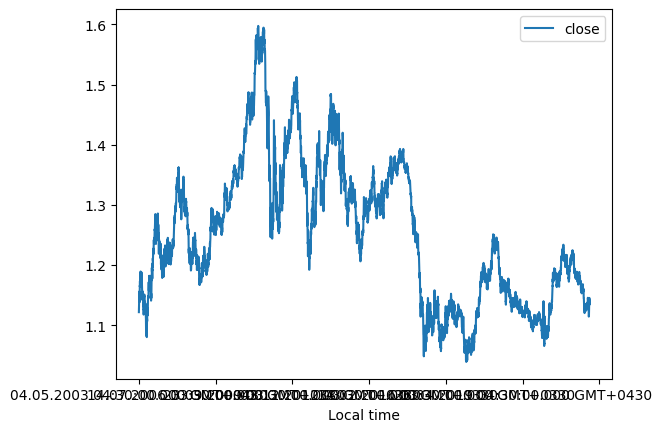

In [51]:
import matplotlib.pyplot as plt
df.plot(x='Local time',y='close')
plt.legend()
plt.show() 

<div dir="rtl">

# افزودن اندیکاتورها

از ویکی پدیا: 

تحلیل تکنیکال (به انگلیسی: Technical analysis) در امور مالی به روش تجزیه و تحلیل برای پیش‌بینی جهت تغییر قیمت‌ها از طریق مطالعهٔ داده‌های گذشته بازار به ویژه قیمت و حجم اطلاق می‌شود. تحلیل‌گران تکنیکال با استدلال آن که عرضه و تقاضا درنهایت باعث کشف قیمت می‌شود، با بررسی و مطابقت گذشتهٔ نمودار قیمت و پیدا کردن الگوهای متفاوت و تکرارشونده، قیمت آینده یک دارایی را پیش‌بینی می‌کنند.[۱] تحلیل تکنیکال اولین بار توسط چارلز داوننت در اواخر قرن ۱۹میلادی ارائه شد. تحلیل فنی بر اساس این فرض انجام می‌شود که فعالیت‌های معاملاتی گذشته می‌تواند تأثیر بسزایی در روند آیندهٔ بازار دارد یا به بیانی دیگر آینده برگرفته از رفتار گذشته میباشد. معامله‌گرانی که از تحلیل تکنیکال استفاده می‌کنند، شاخص‌ها و معیارهای مختلفی را برای بررسی روند بازار (بر اساس نمودارها و حرکات قیمت) به کار می‌گیرند.

ما در این دفترچه سعی می‌کنیم به کمک یادگیری ماشین ارتباط بین چندین شاخص (به اصطلاح اندیکاتور) مورد استفاده در تحلیل تکنیکال با روند سهم را مدلسازی کنیم. بنابراین ابتدا باید مقدار این اندیکاتورها را به داده‌ها اضافه کنیم. 
</div>



In [52]:
import numpy as np
import pandas_ta as ta
# df.ta.indicators()
# help(ta.rsi)

# افزودن ستون‌هایی برای هر اندیکاتور
df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1) #midprice for each bar
df['MA40'] = df.ta.sma(length=40)
df['MA80'] = df.ta.sma(length=80)
df['MA160'] = df.ta.sma(length=160)

# تعریف تابعی برای محاسبه شیب تغییر اندیکاتورها بین چند سطر
from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope
# محاسبه شیب تغییر اندیکاتورها بین چند سطر
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [53]:
# df.loc[30:50,'MA40':'slopeMA40']
df.tail()

,Local time,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
6854,07.02.2022 03:30:00.000 GMT+0330,1.14549,1.14590,1.14154,1.14412,91005.7734,0.006310,61.777238,1.143720,1.133410,1.133287,1.151554,0.000379,-0.000199,-0.000275,0.004325,3.158767
6855,08.02.2022 03:30:00.000 GMT+0330,1.14414,1.14489,1.13963,1.14209,75036.5859,0.006258,59.149840,1.142260,1.133653,1.133102,1.151296,0.000376,-0.000168,-0.000259,0.002473,1.194149
6856,09.02.2022 03:30:00.000 GMT+0330,1.14210,1.14480,1.14027,1.14214,63895.3555,0.006171,59.195872,1.142535,1.133893,1.132894,1.151082,0.000321,-0.000171,-0.000250,0.000651,-0.840445
6857,10.02.2022 03:30:00.000 GMT+0330,1.14213,1.14951,1.13750,1.14116,113935.9766,0.006463,57.820596,1.143505,1.134113,1.132666,1.150871,0.000274,-0.000182,-0.000239,-0.000540,-1.231321
6858,11.02.2022 03:30:00.000 GMT+0330,1.14116,1.14182,1.13299,1.13507,125420.0078,0.006581,50.040330,1.137405,1.134165,1.132497,1.150630,0.000216,-0.000195,-0.000232,-0.001268,-2.265329


<div dir="rtl">

# افزودن تابعی برای محاسبه روندهای گذشته

با ایستادن در یک سطر و نگاه کردن به چند سطر جلوتر می توان گفت که آیا روند صعودی بوده یا نه!
تابع پایین تعریف شده تا برای هر سطر با توجه به چند سطر بعدیش یک روند درج بشه. 
</div>



In [54]:
# تعریف حد سود 
pipdiff = 500*1e-5
# تعریف نسبت حد سود به زیان
SLTPRatio = 2 #pipdiff/Ratio gives SL

def prevTrend(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 # کلاس روند نزولی 
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # کلاس روند صعودی
                break
            else:
                trendcat[line] = 0 # کلاس بدون روند
            
    return trendcat
    

In [55]:
# استفاده از تابع بالا برای افزودن ستون روندهای گذشته به دیتافریم
df['mytarget'] = prevTrend(7, df)
df.head()

,Local time,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
0,04.05.2003 04:30:00.000 GMT+0430,1.12283,1.12354,1.12176,1.12179,2.120461e+05,NaN,NaN,1.122650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,05.05.2003 04:30:00.000 GMT+0430,1.12177,1.13019,1.12030,1.12934,1.050717e+06,NaN,NaN,1.125245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,06.05.2003 04:30:00.000 GMT+0430,1.12937,1.14510,1.12738,1.14244,1.060841e+06,NaN,NaN,1.136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,07.05.2003 04:30:00.000 GMT+0430,1.14234,1.14333,1.13275,1.13504,1.057368e+06,NaN,NaN,1.138040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,08.05.2003 04:30:00.000 GMT+0430,1.13523,1.15092,1.13026,1.14830,1.059766e+06,NaN,NaN,1.140590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<div dir="rtl">

# تحلیل اکتشافی داده‌ها

داده‌ها باید مورد تحلیل داده اکتشافی قرار بگیرن. داده‌های پرت و داده‌های خالی مدلسازی رو با خطا مواجه می‌کنند. 
ضمنا ویژگی‌هایی که با هم مرتبط باشن می تونن به نفع هم کنار برن. 
و موارد دیگه که اینجا از اون ها صرف نظر می کنیم و می تونید برای اطلاع بیشتر آموزش تحلیل داده اکتشافی رو تو وبسایت هم رویش ببینید. 
</div>



C:\Users\MADANKARI\AppData\Local\Temp\ipykernel_11572\4228129163.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


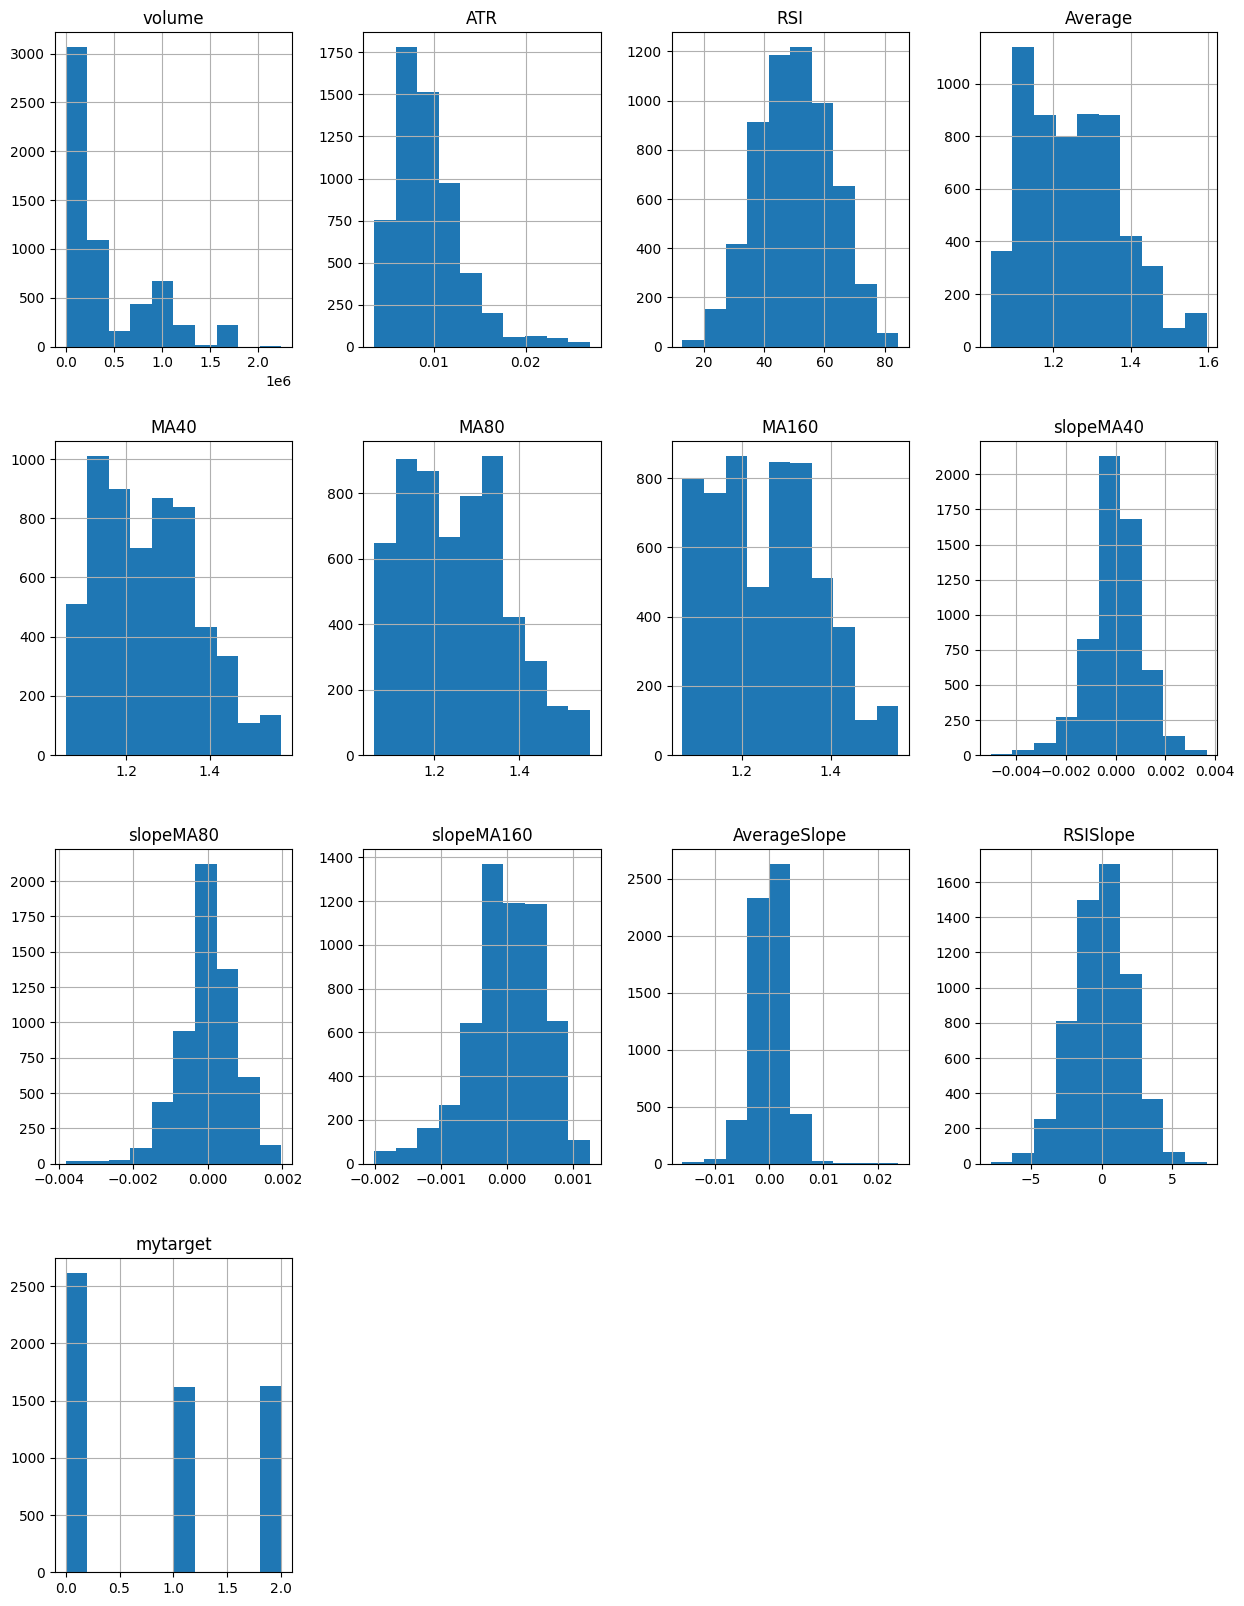

In [56]:
# ترسیم نمودار فراوانی و ساخت دیتافریمی شامل متغیرهای ورودی و خروجی
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

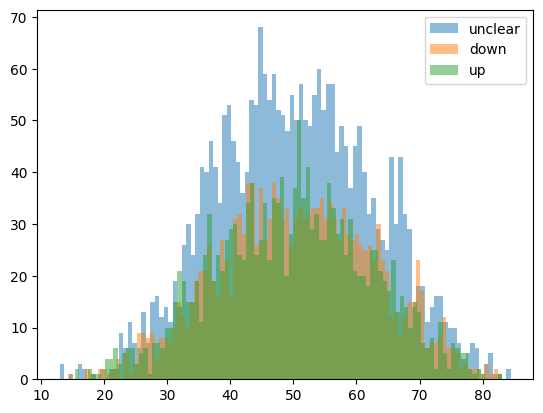

In [57]:
# تحلیل ارتباط بین متغیرهای ورودی (مثلا اندیکاتور آر اس آی) با متغیر خروجی یعنی روند
from matplotlib import pyplot
df_up=df.RSI[ df['mytarget'] == 2 ]
df_down=df.RSI[ df['mytarget'] == 1 ]
df_unclear=df.RSI[ df['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

In [58]:
# حذف سطرهای خالی 
df_model=df_model.dropna()

attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(X)

           ATR        RSI   Average      MA40      MA80     MA160  slopeMA40  \
192   0.010338  54.997499  1.158180  1.164094  1.139421  1.146381   0.000121   
193   0.010422  59.846482  1.169175  1.164789  1.140002  1.146538   0.000227   
194   0.010258  61.670418  1.176625  1.165288  1.140583  1.146672   0.000351   
196   0.010055  64.207805  1.180440  1.165676  1.141288  1.146842   0.000460   
197   0.010173  57.901720  1.178650  1.165754  1.141895  1.146979   0.000448   
...        ...        ...       ...       ...       ...       ...        ...   
6843  0.006012  29.981131  1.118760  1.132544  1.136322  1.154549  -0.000085   
6844  0.005972  31.250478  1.114765  1.132217  1.135765  1.154142  -0.000193   
6846  0.005746  31.184462  1.114570  1.131953  1.135102  1.153724  -0.000260   
6847  0.005977  42.445065  1.119625  1.131801  1.134686  1.153339  -0.000289   
6848  0.005967  47.664127  1.125000  1.131649  1.134332  1.152953  -0.000258   

      slopeMA80  slopeMA160  AverageSlo

<div dir="rtl">

# آموزش مدل یادگیری ماشین

اول داده های آزمایش عملکرد مدل رو جدا و بعد آموزش مدل رو اجرا می کنیم.  ما در اینجا از الگوریتم کلاس‌بندی نزدیک‌ترین همسایگی استفاده می کنیم تا ارتباط کلاس های سه گانه موجود در متغیر خروجی رو با متغیرهای ورودی مدلسازی کنیم. 
</div>



In [59]:
# تقسیم داده‌ها به جامعه آموزش و آزمایش 
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

# تعلیم مدل نزدیک‌ترین همسایگی
from sklearn.neighbors import KNeighborsClassifier

KNNModel = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
KNNModel.fit(X_train, y_train)

y_pred_train_KNN = KNNModel.predict(X_train)
y_pred_test_KNN = KNNModel.predict(X_test)

<div dir="rtl">

# ارزیابی عملکرد مدل

گزارش‌های متعددی میشه گرفت و به روش‌های مختلفی میشه مدل رو ارزیابی و بهینه‌یابی کرد. 
من اینجا صرفا روی ایده تمرکز می کنیم و تحقیق بیشتر رو به خودتون واگذار می کنم. 
</div>



In [60]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train_KNN)
accuracy_test = accuracy_score(y_test, y_pred_test_KNN)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- درصد هر کلاس در دیتافریم چقدر بود؟
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# اگه به جای یادگیری ماشین از انتخاب کاملا بختکی استفاده می‌کردیم
pred_test = np.random.choice([0, 1, 2], len(y_pred_test_KNN))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 54.41%
Accuracy test: 34.18%
0.0    44.362616
2.0    27.932667
1.0    27.704717
Name: mytarget, dtype: float64
Accuracy Gambler: 31.81%


<div dir="rtl">

# ذخیره مدل برای استفاده‌های بعدی

بعد از کلنجار با مدل و بهینه‌سازی اون اگه مدل خوبی از کار دراومد ذخیره کنید. 
این مدل ذخیره شده رو بعدها می‌تونید هر جایی فراخوانی و برای پیش‌بینی وضعیت‌های جدید استفاده کنید. 
مثلا شاید یک ربات معامله گر ساختین که تو هر لحظه اطلاعات نماد رو از سرور کارگزار می گیره و بر اساس پیش بینی روند این مدل سفارش خرید یا فروش ارسال کنه. 
شایدم تو پشت صحنه یه وبسایت گذاشتین که برای دیگران پیش بینی کنه.
 آموزش استریملیت هم رویش از آقای مهندس ماجدی نیا رو ببینید.  
</div>



In [61]:
import joblib

# save your ML model to disk
filename = 'TrendClassKNN.sav'
joblib.dump(KNNModel, filename)

# فراخوانی مدل در جای دیگه
#loaded_model = joblib.load('TrendClassKNN.sav')

['TrendClassKNN.sav']